## Pośrednik (ang. Mediator)

**Typ**: behawioralny \
**Zakres**: obiektowy

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>pośrednik</b> definiuje obiekt, który hermetyzuje sposób współpracy zestawu obiektów. Promuje luźne powiązanie, eliminując konieczność jawnego odnoszenia się obiektów do siebie nawzajem.
</div>

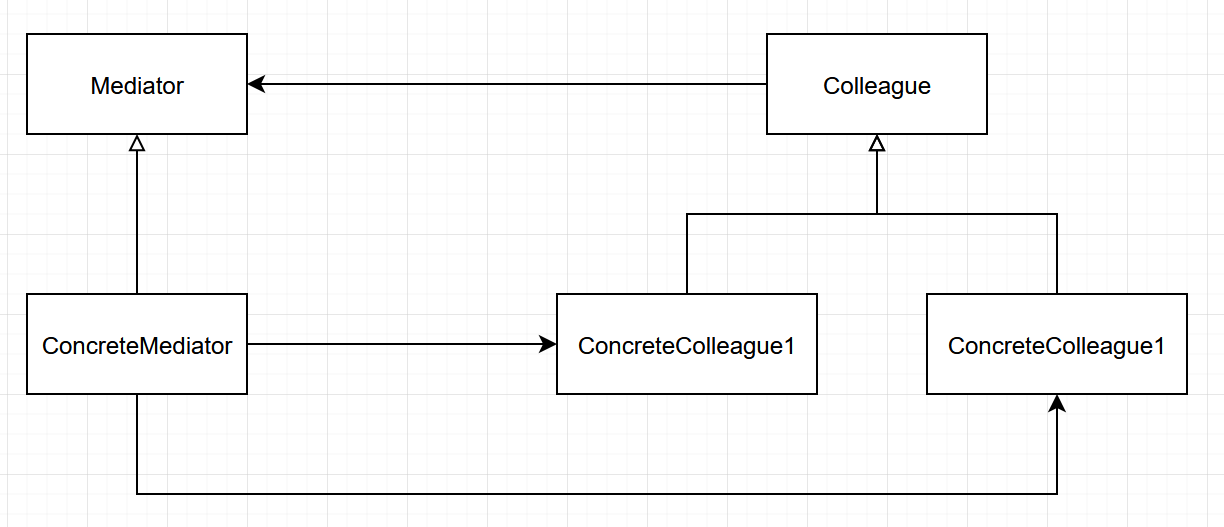

### Problem - bezpośrednia komunikacja wielu obiektów

Pokój czatowy. Użytkownicy wysyłają wiadomości do siebie nawzajem.

**Problem:**
- Każdy użytkownik musi znać wszystkich innych użytkowników
- Dodanie nowego użytkownika wymaga aktualizacji wszystkich
- Złożoność: N użytkowników = N*(N-1) połączeń
- Ciasne powiązanie - trudne w utrzymaniu

### Naiwne podejście - wszyscy znają wszystkich

In [ ]:
class User:
    def __init__(self, name):
        self.name = name
        self.colleagues = []  # ❌ Każdy zna wszystkich
    
    def add_colleague(self, user):
        """Dodaj innego użytkownika"""
        self.colleagues.append(user)
    
    def send(self, message):
        """Wyślij wiadomość do wszystkich"""
        print(f"{self.name}: {message}")
        # ❌ Użytkownik sam zarządza wysyłaniem
        for colleague in self.colleagues:
            if colleague != self:
                colleague.receive(message, self)
    
    def receive(self, message, sender):
        """Odbierz wiadomość"""
        print(f"  {self.name} otrzymał od {sender.name}: {message}")

In [ ]:
# 3 użytkowników - trzeba wszystkich połączyć
alice = User("Alice")
bob = User("Bob")
charlie = User("Charlie")

# ❌ Każdy musi znać każdego - 6 połączeń dla 3 użytkowników!
alice.add_colleague(bob)
alice.add_colleague(charlie)
bob.add_colleague(alice)
bob.add_colleague(charlie)
charlie.add_colleague(alice)
charlie.add_colleague(bob)

alice.send("Cześć wszystkim!")

**Problemy:**
- ❌ **Ciasne powiązanie** - każdy użytkownik zna wszystkich (`colleagues`)
- ❌ **Złożoność O(N²)** - 10 użytkowników = 90 połączeń!
- ❌ **Trudność utrzymania** - dodanie użytkownika wymaga aktualizacji wszystkich
- ❌ **Brak kontroli** - trudno dodać logikę (moderacja, logi, filtry)

### Rozwiązanie - wzorzec Pośrednik

**Idea:** Centralny obiekt (Pośrednik) **koordynuje** komunikację między obiektami.

Użytkownicy **nie** komunikują się bezpośrednio - wysyłają wiadomości do pośrednika.

### Krok 1: Interfejs Mediator

In [ ]:
from abc import ABC, abstractmethod

class ChatMediator(ABC):
    """Interfejs pośrednika czatu"""
    
    @abstractmethod
    def send_message(self, message, user):
        """Wyślij wiadomość od użytkownika"""
        pass
    
    @abstractmethod
    def add_user(self, user):
        """Dodaj użytkownika do czatu"""
        pass

### Krok 2: ConcreteMediator - pokój czatowy

In [ ]:
class ChatRoom(ChatMediator):
    """Konkretny pośrednik - pokój czatowy"""
    
    def __init__(self):
        self.users = []  # Pośrednik zna wszystkich użytkowników
    
    def add_user(self, user):
        """Dodaj użytkownika"""
        self.users.append(user)
        user.mediator = self  # Użytkownik zna pośrednika
        print(f"➕ {user.name} dołączył do czatu")
    
    def send_message(self, message, sender):
        """Rozgłoś wiadomość do wszystkich oprócz nadawcy"""
        print(f"\n💬 {sender.name}: {message}")
        # Pośrednik zarządza dostarczaniem
        for user in self.users:
            if user != sender:
                user.receive(message, sender)

**Kluczowy mechanizm:**
- Pośrednik **zna wszystkich** użytkowników (`self.users`)
- Użytkownik **zna tylko** pośrednika (`user.mediator`)
- Komunikacja: `User → Mediator → Other Users`

### Krok 3: Colleague - użytkownik czatu

In [ ]:
class User:
    """Użytkownik (Colleague) - zna tylko pośrednika"""
    
    def __init__(self, name):
        self.name = name
        self.mediator = None  # Zna tylko pośrednika (nie innych użytkowników!)
    
    def send(self, message):
        """Wyślij wiadomość PRZEZ pośrednika"""
        self.mediator.send_message(message, self)
    
    def receive(self, message, sender):
        """Odbierz wiadomość"""
        print(f"   → {self.name} otrzymał od {sender.name}: '{message}'")

### Krok 4: Użycie - prosta komunikacja

In [ ]:
# Tworzenie pośrednika
chat = ChatRoom()

# Tworzenie użytkowników
alice = User("Alice")
bob = User("Bob")
charlie = User("Charlie")

# ✅ Dodawanie do pośrednika (nie do siebie nawzajem!)
chat.add_user(alice)
chat.add_user(bob)
chat.add_user(charlie)

# Komunikacja PRZEZ pośrednika
alice.send("Cześć wszystkim!")
bob.send("Witaj Alice!")

**Zalety:**
- ✅ **Luźne powiązanie** - użytkownicy nie znają się nawzajem
- ✅ **Prostota** - 10 użytkowników = 10 połączeń (nie 90!)
- ✅ **Łatwość rozbudowy** - nowy użytkownik = `chat.add_user()`
- ✅ **Centralizacja logiki** - moderacja, logi w jednym miejscu

## Struktura wzorca

**Elementy wzorca Pośrednik:**

1. **Mediator** - `ChatMediator`
   - Interfejs dla komunikacji między obiektami
   - Definiuje `send_message()`, `add_user()`

2. **ConcreteMediator** - `ChatRoom`
   - Implementuje koordynację
   - Zna wszystkich uczestników (`self.users`)
   - Zarządza komunikacją

3. **Colleague** - `User`
   - Obiekt uczestniczący w komunikacji
   - Zna tylko pośrednika (`self.mediator`)
   - Nie zna innych uczestników

**Kluczowa właściwość:**
> Obiekty **nie komunikują się bezpośrednio** - wszystko przechodzi przez pośrednika

## Przykład 2 - Kontrola lotów (Air Traffic Control)

In [ ]:
from abc import ABC, abstractmethod

# ════════════════════════════════════════════════════════════
# Mediator
# ════════════════════════════════════════════════════════════
class ControlTower(ABC):
    """Wieża kontrolna - pośrednik między samolotami"""
    
    @abstractmethod
    def register_aircraft(self, aircraft):
        pass
    
    @abstractmethod
    def request_landing(self, aircraft):
        pass


# ════════════════════════════════════════════════════════════
# ConcreteMediator
# ════════════════════════════════════════════════════════════
class Airport(ControlTower):
    """Lotnisko - konkretna wieża kontrolna"""
    
    def __init__(self, name):
        self.name = name
        self.aircrafts = []
        self.runway_busy = False
    
    def register_aircraft(self, aircraft):
        """Zarejestruj samolot"""
        self.aircrafts.append(aircraft)
        aircraft.tower = self
        print(f"✈️  {aircraft.name} zarejestrowany w {self.name}")
    
    def request_landing(self, aircraft):
        """Zarządzaj lądowaniem - CENTRALNA LOGIKA"""
        print(f"\n📡 {aircraft.name} prosi o lądowanie...")
        
        if not self.runway_busy:
            self.runway_busy = True
            print(f"✅ {self.name}: Lądowanie dozwolone dla {aircraft.name}")
            aircraft.land()
            self.runway_busy = False
        else:
            print(f"⏳ {self.name}: Pas zajęty, {aircraft.name} czeka w kolejce...")
            aircraft.wait()


# ════════════════════════════════════════════════════════════
# Colleague
# ════════════════════════════════════════════════════════════
class Aircraft:
    """Samolot - zna tylko wieżę kontrolną"""
    
    def __init__(self, name):
        self.name = name
        self.tower = None  # Zna tylko pośrednika!
    
    def request_landing(self):
        """Prośba o lądowanie PRZEZ wieżę"""
        self.tower.request_landing(self)
    
    def land(self):
        print(f"🛬 {self.name} ląduje")
    
    def wait(self):
        print(f"⏸️  {self.name} czeka w powietrzu")

In [ ]:
# Tworzenie lotniska (pośrednika)
airport = Airport("Lotnisko Chopina")

# Samoloty nie znają się nawzajem
flight1 = Aircraft("LOT123")
flight2 = Aircraft("RYA456")
flight3 = Aircraft("WIZ789")

# Rejestracja w wieży
airport.register_aircraft(flight1)
airport.register_aircraft(flight2)
airport.register_aircraft(flight3)

# Prośby o lądowanie - wieża koordynuje
flight1.request_landing()
flight2.request_landing()  # Pas zajęty!
flight3.request_landing()  # Pas zajęty!

**Kluczowe:**
- Samoloty **NIE** komunikują się ze sobą bezpośrednio
- Wieża **centralizuje logikę** (zarządza pasem startowym)
- Samoloty znają tylko interfejs pośrednika

## Pośrednik vs Obserwator

| Aspekt | Pośrednik | Obserwator |
|--------|-----------|------------|
| **Cel** | Koordynacja **dwukierunkowej** komunikacji | **Powiadamianie** o zmianach (jednokierunkowe) |
| **Komunikacja** | Colleagues → Mediator → Colleagues | Subject → Observers |
| **Zależność** | Colleagues znają **tylko** Mediator |  Subject zna observers |
| **Logika** | Mediator zawiera **logikę koordynacji** | Subject tylko **powiadamia** |
| **Przykład** | Pokój czatu (dwustronna rozmowa) | YouTube (jednostronne powiadomienie) |

**Kluczowa różnica:**
```python
# Pośrednik - DWUKIERUNKOWA komunikacja
user1.send("Hello")  # → mediator → user2, user3
user2.send("Hi")     # → mediator → user1, user3

# Obserwator - JEDNOKIERUNKOWA komunikacja
channel.upload("Video")  # → observer1, observer2, observer3
# Observers NIE wysyłają z powrotem do channel
```

## Pośrednik vs Fasada

| Aspekt | Pośrednik | Fasada |
|--------|-----------|--------|
| **Cel** | **Koordynacja** komunikacji | **Uproszczenie** interfejsu |
| **Komunikacja** | Dwukierunkowa (Colleagues ↔ Mediator) | Jednokierunkowa (Client → Facade → Subsystems) |
| **Wiedza** | Colleagues **znają** Mediator | Subsystems **nie znają** Facade |
| **Wzorzec** | Behawioralny | Strukturalny |

**Przykład:**
```python
# Pośrednik - obiekty WIEDZĄ o pośredniku
user.send("Hello")  # user.mediator.send_message()

# Fasada - podsystemy NIE wiedzą o fasadzie
facade.compile()  # fasada wywołuje compiler, linker, loader
# Ale compiler NIE wie o fasadzie!
```

## Kiedy używać wzorca Pośrednik?

Wzorzec Pośrednik stosuj gdy:

1. **Wiele obiektów komunikuje się na wiele sposobów**
   - Bezpośrednia komunikacja prowadzi do plątaniny zależności

2. **Chcesz scentralizować złożoną logikę koordynacji**
   - Łatwiejsza analiza i modyfikacja

3. **Trudno ponownie użyć obiektów z powodu zależności**
   - Obiekty ciasno powiązane ze sobą

4. **Zachowanie rozproszone w wielu klasach**
   - Chcesz je scentralizować

**Przykłady praktyczne:**
- Pokoje czatowe (chat rooms)
- Kontrola lotów (air traffic control)
- GUI - komponenty formularza (button włącza/wyłącza inne)
- MVC - Controller jako pośrednik między Model i View
- Gry - Game Loop koordynuje entities
- Smart Home - Hub koordynuje urządzenia

**Kluczowe:**
- Komponenty **nie znają się** nawzajem (Checkbox nie wie o Button)
- Logika koordynacji w **jednym miejscu** (`dialog.notify()`)
- Łatwo zmienić logikę (tylko w Dialog, nie w każdym komponencie)

## Podsumowanie

Wzorzec Pośrednik:
- ✅ **Luźne powiązanie** - obiekty nie znają się nawzajem
- ✅ **Centralizacja logiki** - łatwiej utrzymać i modyfikować
- ✅ **Redukcja złożoności** - N obiektów = N połączeń (nie N²)
- ✅ **Single Responsibility** - obiekty nie zarządzają komunikacją
- ⚠️ **God Object** - pośrednik może być zbyt złożony
- ⚠️ **Single Point of Failure** - wszystko zależy od pośrednika

**Kluczowa idea:**
> **Centralizacja komunikacji** - obiekty komunikują się TYLKO przez pośrednika

**Struktura:**
```python
# Mediator
class Mediator(ABC):
    @abstractmethod
    def notify(self, sender, event):
        pass

# ConcreteMediator
class ConcreteMediator(Mediator):
    def __init__(self):
        self.colleagues = []  # Zna wszystkich
    
    def notify(self, sender, event):
        # CENTRALNA logika koordynacji
        for colleague in self.colleagues:
            colleague.handle(event)

# Colleague
class Colleague:
    def __init__(self, mediator):
        self.mediator = mediator  # Zna tylko pośrednika!
    
    def send(self, event):
        self.mediator.notify(self, event)  # Przez pośrednika
```

**Istota wzorca:**
- **Centralizacja:** Cała komunikacja przez jeden obiekt
- **Luźne powiązanie:** `Colleague` nie zna innych `Colleague`
- **Koordynacja:** Mediator zarządza interakcjami
- **Redukcja złożoności:** O(N) zamiast O(N²) połączeń

**Przepływ:**
1. Colleague wysyła zdarzenie do Mediator
2. Mediator decyduje kogo powiadomić
3. Mediator wywołuje metody na innych Colleagues

**Różnice kluczowe:**
- **vs Observer:** dwukierunkowa koordynacja (nie tylko powiadomienia)
- **vs Facade:** Colleagues ZNAJĄ Mediator (Subsystems nie znają Facade)